<a href="https://colab.research.google.com/github/benvekedim/Clustering/blob/main/AffinityPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
data = iris.data[:, [2,3]]

#AffinityPropagation
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.96)

#fit the model
model.fit(data)

#prediction
prediction = model.predict(data)
prediction 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
#unique clusters
np.unique(prediction)

array([0, 1, 2])

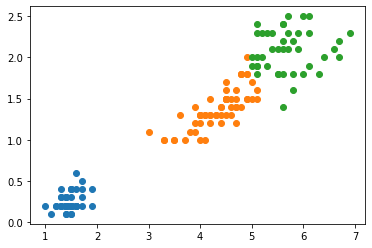

In [38]:
for cluster in np.unique(prediction):
  row_ix = np.where(prediction==cluster)
  plt.scatter(data[row_ix,0],data[row_ix,1])
plt.show()

In [39]:
#silhouette_score

from sklearn.metrics import silhouette_score
score = silhouette_score(X=data,labels=prediction)
score

0.661324829912024

In [40]:
damping_list = np.arange(80,97)/100
damping_list

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96])

In [45]:
len(damping_list)

17

In [42]:
sil_score = []
for i in damping_list:
  model = AffinityPropagation(damping = i)
  model.fit(data)
  prediction = model.predict(data)
  score = silhouette_score(X=data,labels=prediction)
  sil_score.append(score)

print(sil_score)


[0.572858149775547, 0.5668966988650062, 0.572858149775547, 0.572858149775547, 0.5668966988650062, 0.5668966988650062, 0.572858149775547, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.6138185997804122, 0.661324829912024]


In [53]:
indice = np.where(sil_score==np.max(sil_score))[0][0]

In [54]:
sil_score[indice]

0.661324829912024